### Project: Real-Estate Statistical Modeling
## Notebook 01: EDA & Data Cleaning

In [2]:
# Import Libraries and Modules

# Data Manipulation & Analysis Library
import pandas as pd
# Multi-Dimensional Arrays and Matrices Library
import numpy as np
# Plotting module from Matplotlib visualization Library
import matplotlib.pyplot as plt
# Statistical data visualization library built on Matplotlib
import seaborn as sns

In [3]:
# Set-up data filepath
data = "../data/"
train = "datasets/train.csv"
test = "datasets/test.csv"

#Read in the data

# Dataset to be used in training
train_df = pd.read_csv(data+train)
# Dataset to be used in validation
test_df = pd.read_csv(data+test)

In [4]:
# Check that all is copacetic
train_df.head(3)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000


In [5]:
# Check that all is copacetic
test_df.head(3)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New


In [15]:
# 80 Features provide plenty of opportunities to overcomplicate the model
train_df.dtypes.value_counts()

object     42
int64      28
float64    11
dtype: int64

In [7]:
#Create list of features with null values in either test or train datasets
null_features = []
for column in test_df.columns:
    if (train_df[column].isnull().sum()>0) | (test_df[column].isnull().sum()>0):
        null_features.append(column)
        print(f'Train {column}:\t{train_df[column].isnull().sum()} null ',f'Test {column}:\t{test_df[column].isnull().sum()} null ' )

Train Lot Frontage:	330 null  Test Lot Frontage:	160 null 
Train Alley:	1911 null  Test Alley:	820 null 
Train Mas Vnr Type:	22 null  Test Mas Vnr Type:	1 null 
Train Mas Vnr Area:	22 null  Test Mas Vnr Area:	1 null 
Train Bsmt Qual:	55 null  Test Bsmt Qual:	25 null 
Train Bsmt Cond:	55 null  Test Bsmt Cond:	25 null 
Train Bsmt Exposure:	58 null  Test Bsmt Exposure:	25 null 
Train BsmtFin Type 1:	55 null  Test BsmtFin Type 1:	25 null 
Train BsmtFin SF 1:	1 null  Test BsmtFin SF 1:	0 null 
Train BsmtFin Type 2:	56 null  Test BsmtFin Type 2:	25 null 
Train BsmtFin SF 2:	1 null  Test BsmtFin SF 2:	0 null 
Train Bsmt Unf SF:	1 null  Test Bsmt Unf SF:	0 null 
Train Total Bsmt SF:	1 null  Test Total Bsmt SF:	0 null 
Train Electrical:	0 null  Test Electrical:	1 null 
Train Bsmt Full Bath:	2 null  Test Bsmt Full Bath:	0 null 
Train Bsmt Half Bath:	2 null  Test Bsmt Half Bath:	0 null 
Train Fireplace Qu:	1000 null  Test Fireplace Qu:	422 null 
Train Garage Type:	113 null  Test Garage Type:	44 n

In [8]:
# Create a list of categorical features
cat_list = []
for i in range(len(train_df.columns)):
    if train_df.dtypes[i] == 'object':
        cat_list.append(train_df.columns[i])

In [9]:
# Create a list of numerical features
num_list = []
for i in range(len(train_df.columns)):
    if train_df.dtypes[i] == 'int64':
        num_list.append(train_df.columns[i])
num_list

['Id',
 'PID',
 'MS SubClass',
 'Lot Area',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 'Mo Sold',
 'Yr Sold',
 'SalePrice']

In [12]:
train_df.Id.max()

2930

In [9]:
# Create a list of categorical features free of nulls in both test and train datasets
nulless_features = []
for feat in cat_list:
    if (train_df[feat].isnull().sum()==0) & (test_df[feat].isnull().sum()==0):
        nulless_features.append(feat)
        print(f'   Train {feat}:\t{train_df[feat].isnull().sum()} null \t Test {feat}:\t {test_df[feat].isnull().sum()} null' )

   Train MS Zoning:	0 null 	 Test MS Zoning:	 0 null
   Train Street:	0 null 	 Test Street:	 0 null
   Train Lot Shape:	0 null 	 Test Lot Shape:	 0 null
   Train Land Contour:	0 null 	 Test Land Contour:	 0 null
   Train Utilities:	0 null 	 Test Utilities:	 0 null
   Train Lot Config:	0 null 	 Test Lot Config:	 0 null
   Train Land Slope:	0 null 	 Test Land Slope:	 0 null
   Train Neighborhood:	0 null 	 Test Neighborhood:	 0 null
   Train Condition 1:	0 null 	 Test Condition 1:	 0 null
   Train Condition 2:	0 null 	 Test Condition 2:	 0 null
   Train Bldg Type:	0 null 	 Test Bldg Type:	 0 null
   Train House Style:	0 null 	 Test House Style:	 0 null
   Train Roof Style:	0 null 	 Test Roof Style:	 0 null
   Train Roof Matl:	0 null 	 Test Roof Matl:	 0 null
   Train Exterior 1st:	0 null 	 Test Exterior 1st:	 0 null
   Train Exterior 2nd:	0 null 	 Test Exterior 2nd:	 0 null
   Train Exter Qual:	0 null 	 Test Exter Qual:	 0 null
   Train Exter Cond:	0 null 	 Test Exter Cond:	 0 null
   Tra

In [10]:
# Regression models cannot handle NaNs, there are only two (one in each col) so the loss in data is not great
train_df.dropna(subset=['Garage Area','Total Bsmt SF'],inplace=True)

In [11]:
train_df[train_df['Gr Liv Area']>4000]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
960,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,...,0,480,Gd,NaN,NaN,0,1,2008,New,160000
1885,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,...,0,0,NaN,NaN,Elev,17000,10,2007,New,183850


In [12]:
# Drop unusual sales (>4,000 sq-ft of above grade living area), the two outliers identified above
train_df.drop([960,1885],inplace=True)

In [13]:
# Combine Year of construction feature with year remodelled since over 700 have the same and multicollinearity is bad for the model
train_df['Year Built/Remod'] = train_df['Year Built']*train_df['Year Remod/Add']
test_df['Year Built/Remod'] = test_df['Year Built']*test_df['Year Remod/Add']

In [14]:
train_df[['Year Remod/Add', 'Year Built', '1st Flr SF', 'Gr Liv Area', 'Overall Qual']].describe()

,Year Remod/Add,Year Built,1st Flr SF,Gr Liv Area,Overall Qual
count,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000
mean,1984.175867,1971.709819,1161.084514,1495.683928,6.109917
std,21.026942,30.161488,379.175206,485.784559,1.421499
min,1950.000000,1872.000000,334.000000,334.000000,1.000000
25%,1964.500000,1954.000000,879.000000,1129.000000,5.000000
50%,1993.000000,1974.000000,1093.000000,1444.000000,6.000000
75%,2004.000000,2001.000000,1404.500000,1728.000000,7.000000
max,2010.000000,2010.000000,3820.000000,3820.000000,10.000000


In [15]:
# create a list of numerical features
nume_features = []
for i in range(len(train_df.columns)):
    if train_df.dtypes[i] != 'object':
        nume_features.append(train_df.columns[i])

In [16]:
# Transform the target- 'Sale Price' to log($) by taking the 'natural log'
train_df['SalePrice_log'] = np.log(train_df.SalePrice)

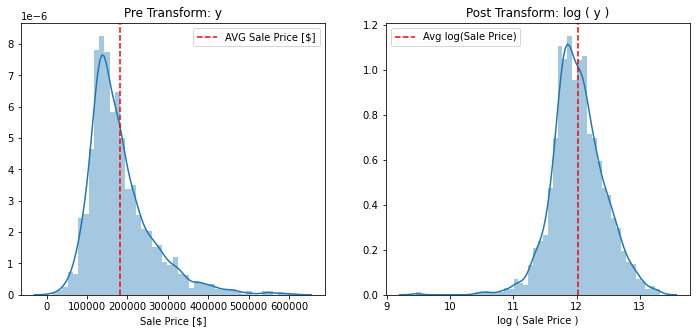

In [17]:
# Consider the distribution of the target: Sale Price. 
# Notice how the distribution approaches Normal after a log transfromation
fig, (ax0, ax1) = plt.subplots( nrows=1, ncols=2, sharey=False,  figsize=(12, 5) )
sns.distplot( train_df['SalePrice'], kde=True,ax=ax0 );
sns.distplot( train_df['SalePrice_log'], kde=True,ax=ax1 );
ax0.set( xlabel='Sale Price [$]', title='Pre Transform: y');
ax1.set( xlabel='log ( Sale Price )', title='Post Transform: log ( y )')
ax0.axvline(train_df['SalePrice'].mean(), color="r", label="AVG Sale Price [$]",linestyle="--");
ax1.axvline(train_df['SalePrice_log'].mean(), color="r",label="Avg log(Sale Price)", linestyle="--");
ax0.legend();
ax1.legend();
#plt.savefig( '../images/SalePriceHistLog_sns.png');

In [18]:
# Distinguish neighborhoods with homes selling way above and below the sample mean
train_df['NeighborhoodC'] = train_df['Neighborhood'].map({'Sawyer' :1,
                                                         'SawyerW':0,
                                                         'NAmes'  :0,
                                                         'Timber' :0,
                                                         'Edwards':0,
                                                         'OldTown':0,
                                                         'BrDale' :1,
                                                         'CollgCr':0,
                                                         'Somerst':0,
                                                         'Mitchel':0,
                                                         'StoneBr':2,
                                                         'NridgHt':2,
                                                         'Gilbert':0,
                                                         'Crawfor':0,
                                                         'IDOTRR' :1,
                                                         'NWAmes' :0,
                                                         'Veenker':0,
                                                         'MeadowV':1,
                                                         'SWISU'  :1,
                                                         'NoRidge':2,
                                                         'ClearCr':0,
                                                         'Blmngtn':0,
                                                         'BrkSide':1,
                                                         'NPkVill':1,
                                                         'Blueste':1,
                                                         'GrnHill':0,
                                                         'Greens' :0,
                                                         'Landmrk':1})

In [19]:
# Distinguish neighborhoods with homes typically selling well above the sample mean from those well below
test_df['NeighborhoodC'] = test_df['Neighborhood'].map({'Sawyer' :1,
                                                         'SawyerW':0,
                                                         'NAmes'  :0,
                                                         'Timber' :0,
                                                         'Edwards':0,
                                                         'OldTown':0,
                                                         'BrDale' :1,
                                                         'CollgCr':0,
                                                         'Somerst':0,
                                                         'Mitchel':0,
                                                         'StoneBr':2,
                                                         'NridgHt':2,
                                                         'Gilbert':0,
                                                         'Crawfor':0,
                                                         'IDOTRR' :1,
                                                         'NWAmes' :0,
                                                         'Veenker':0,
                                                         'MeadowV':1,
                                                         'SWISU'  :1,
                                                         'NoRidge':2,
                                                         'ClearCr':0,
                                                         'Blmngtn':0,
                                                         'BrkSide':1,
                                                         'NPkVill':1,
                                                         'Blueste':1,
                                                         'GrnHill':0,
                                                         'Greens' :0,
                                                         'Landmrk':1})

### Select Categorical Features from Ames housing Data Set
1. Referring to Data Library for defiinitions of sub-categorical features, follow best judgement for an initial prediction to beat the null.
2. Guess and check with boxplots, returning here to adjust paramaters.
3. I chose the following values initially based on what made sense to me. 

In [20]:
# Aggregate driveways not paved
train_df['Paved DriveC'] = train_df['Paved Drive'].map({'N':1, 'P':1, 'Y':0})
# Aggregate Lot shapes as the most Irregular(IR3), and other, more "regular", shapes
train_df['Lot ShapeC'] = train_df['Lot Shape'].map({'IR1':0, 'Reg':0, 'IR2':0, 'IR3':1})
# Separate undesirable Land Contours such as Banked(Bnk), and aggregate other contours such as hillside, level/flat, and depression
train_df['Land ContourC'] = train_df['Land Contour'].map({'Lvl':0, 'HLS':1, 'Low':0, 'Bnk':0})
# Isolate desirable lot configurations such as cul-de-sac(CulDSac), and aggregate heavier trafficked lot configs
train_df['Lot ConfigC'] = train_df['Lot Config'].map({'FR2':0,'FR3':0, 'Corner':0, 'Inside':0, 'CulDSac':1})
# Aggregate properties near railroads(RRNe/RRae) with street noise(Artery/Feedr), and consider locations near parks etc.(PosA/PosN)
train_df['Condition 1C'] = train_df['Condition 1'].map({'Norm':0,'RRAn':0, 'RRNn':0,'Feedr':1, 'Artery':1, 'RRNe':1,'RRAe':1, 'PosA':2,'PosN':0})
# Aggregate urban building types with denser living conditions(Duplex/Two-Family Conversions/Townhouses Inside Type) and isolate types with less cramped enviornments
train_df['Bldg TypeC'] = train_df['Bldg Type'].map({'1Fam':0,'TwnhsE':0,'Twnhs':1, '2fmCon':1,'Duplex':1})
# Isolate homes with Asbestos shingles as the exterior covering on the house/dwelling
train_df['Exterior 1stC'] = train_df['Exterior 1st'].map({'HdBoard':0, 'VinylSd':0, 'Wd Sdng':0, 'BrkFace':0, 'Plywood':0, 'MetalSd':0,'AsbShng':1,
                                                          'CemntBd':0, 'WdShing':0, 'Stucco':0, 'BrkComm':0, 'Stone':0,'CBlock':0, 'ImStucc':0,'AsphShn':0})
# Separate External material Quality, Fair from Excellent
train_df['Exter QualC'] = train_df['Exter Qual'].map({'Gd':0, 'TA':0, 'Fa':1, 'Ex':2})
# Distinguish type of foundation, granite slab as undesirable and poured concrete typically more favorable
train_df['FoundationC'] = train_df['Foundation'].map({'CBlock':0, 'BrkTil':1, 'Stone':0, 'Wood':0,'Slab':1, 'PConc':0})
# Distinguish sub-optimal heating quality and condition
train_df['Heating QCC'] = train_df['Heating QC'].map({'Ex':2, 'TA':0, 'Gd':0, 'Po':1,'Fa':0})
# Distinguish homes with Central Air-Conditioning as a feature impacting Sale Price
train_df['Central AirC'] = train_df['Central Air'].map({'Y':0, 'N':1})

In [21]:
# Aggregate driveways not paved
test_df['Paved DriveC'] = test_df['Paved Drive'].map({'N':1, 'P':1, 'Y':0})
# Aggregate Lot shapes as the most Irregular(IR3), and other, more "regular", shapes
test_df['Lot ShapeC'] = test_df['Lot Shape'].map({'IR1':0, 'Reg':0, 'IR2':0, 'IR3':1})
# Separate desirable Land Contours such as Hillsides with a view(HLS), and aggregate other contours such as banks, level/flat, and depression
test_df['Land ContourC'] = test_df['Land Contour'].map({'Lvl':0, 'HLS':1, 'Low':0, 'Bnk':0})
# Isolate desirable lot configurations such as cul-de-sac(CulDSac), and aggregate heavier trafficked lot configs
test_df['Lot ConfigC'] = test_df['Lot Config'].map({'FR2':0,'FR3':0, 'Corner':0, 'Inside':0, 'CulDSac':1})
# Aggregate properties near railroads(RRNe/RRae) with street noise(Artery/Feedr), and consider locations near parks etc.(PosA/PosN)
test_df['Condition 1C'] = test_df['Condition 1'].map({'Norm':0,'RRAn':0, 'RRNn':0,'Feedr':1, 'Artery':1, 'RRNe':1,'RRAe':1, 'PosA':2,'PosN':0})
# Aggregate urban building types with denser living conditions(Duplex/Two-Family Conversions/Townhouses Inside Type) and isolate types with less cramped enviornments
test_df['Bldg TypeC'] = test_df['Bldg Type'].map({'1Fam':0,'TwnhsE':0,'Twnhs':1, '2fmCon':1,'Duplex':1})
# Isolate homes with Asbestos shingles as the exterior covering on the house/dwelling
test_df['Exterior 1stC'] = test_df['Exterior 1st'].map({'HdBoard':0, 'VinylSd':0, 'Wd Sdng':0, 'BrkFace':0, 'Plywood':0, 'MetalSd':0,'AsbShng':1,'PreCast':0,
                                                          'CemntBd':0, 'WdShing':0, 'Stucco':0, 'BrkComm':0, 'Stone':0,'CBlock':0, 'ImStucc':0,'AsphShn':0})
# Separate External material Quality, Fair from Excellent
test_df['Exter QualC'] = test_df['Exter Qual'].map({'Gd':0, 'TA':0, 'Fa':1, 'Ex':2})
# Distinguish type of foundation, granite slab as undesirable and poured concrete typically more favorable
test_df['FoundationC'] = test_df['Foundation'].map({'CBlock':0, 'BrkTil':1, 'Stone':0, 'Wood':0,'Slab':1, 'PConc':0})
# Distinguish sub-optimal heating quality and condition
test_df['Heating QCC'] = test_df['Heating QC'].map({'Ex':2, 'TA':0, 'Gd':0, 'Po':1,'Fa':1})
# Distinguish homes with Central Air-Conditioning as a feature impacting Sale Price
test_df['Central AirC'] = test_df['Central Air'].map({'Y':0, 'N':1})

In [22]:
# Creating a submission dataframe out of the original test_df
clean_traindf = train_df.copy()
cat_select_traindf = train_df[['NeighborhoodC', 'Paved DriveC', 'Lot ShapeC', 'Land ContourC','Lot ConfigC', 'Condition 1C','Bldg TypeC','Exterior 1stC','Exter QualC', 'FoundationC', 'Heating QCC', 'Central AirC']].copy()
cat_select_testdf = test_df[['NeighborhoodC', 'Paved DriveC', 'Lot ShapeC', 'Land ContourC','Lot ConfigC', 'Condition 1C','Bldg TypeC','Exterior 1stC','Exter QualC', 'FoundationC', 'Heating QCC', 'Central AirC']].copy()

In [23]:
# Write our sparkly clean dataframe to a csv for Pre-Processing and Feature Engineering
clean_traindf.to_csv(data+'datasets/clean_train.csv')
cat_select_traindf.to_csv(data+'datasets/cat_select_train_m4.csv')
cat_select_testdf.to_csv(data+'datasets/cat_select_test_m4.csv')

In [ ]:
# Use IPython magic command %store to pass clean dataFrames to Notebook: 02_Preprocessing
# Source Stack Overflow on sharing-variables-between-notebooks:
# <https://stackoverflow.com/questions/31621414/share-data-between-ipython-notebooks>
%store clean_traindf